In [1]:
#importing all the necessary libaries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

#import data as a dataframe.
train = pd.read_csv('Training_Dataset_Time_Deposit - Sheet1.csv')
test1 = pd.read_csv('Testing_Dataset_Time_Deposit - Sheet1 (1).csv')

In [2]:
#view the first few rows of the data
train.head()

,key,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,444,45,management,married,university.degree,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,445,34,admin.,married,basic.9y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,446,47,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,447,42,technician,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,448,57,technician,married,basic.4y,unknown,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
test1.head()

,key,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [4]:
#checking the no of rows and columns in the dataframe.
train.shape

(4170, 22)

In [5]:
test1.shape

(37018, 21)

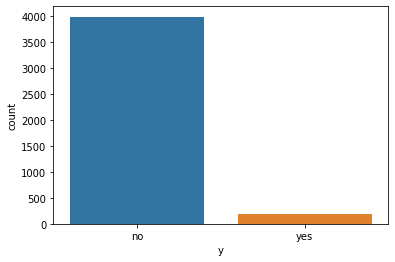

In [6]:
#distribution of onboard clients plot.
sns_plot =sns.countplot(x='y',data=train)
plt.savefig('subdistribution.png')

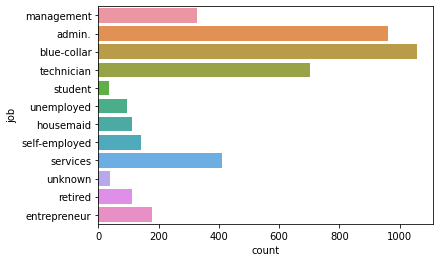

In [7]:
sns_plot = sns.countplot(y='job', data=train)
plt.savefig('jobdistribution.png')

# #PREPROCESSING

In [8]:
#checking for the null values.
train.isnull().sum()

key               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
#drop any duplicates in the data
train = train.drop_duplicates()

In [10]:
#percentage distribution of onboard clients.
train['y'].value_counts()/train['y'].count()

no     0.955635
yes    0.044365
Name: y, dtype: float64

### Exploring Numerical variables 

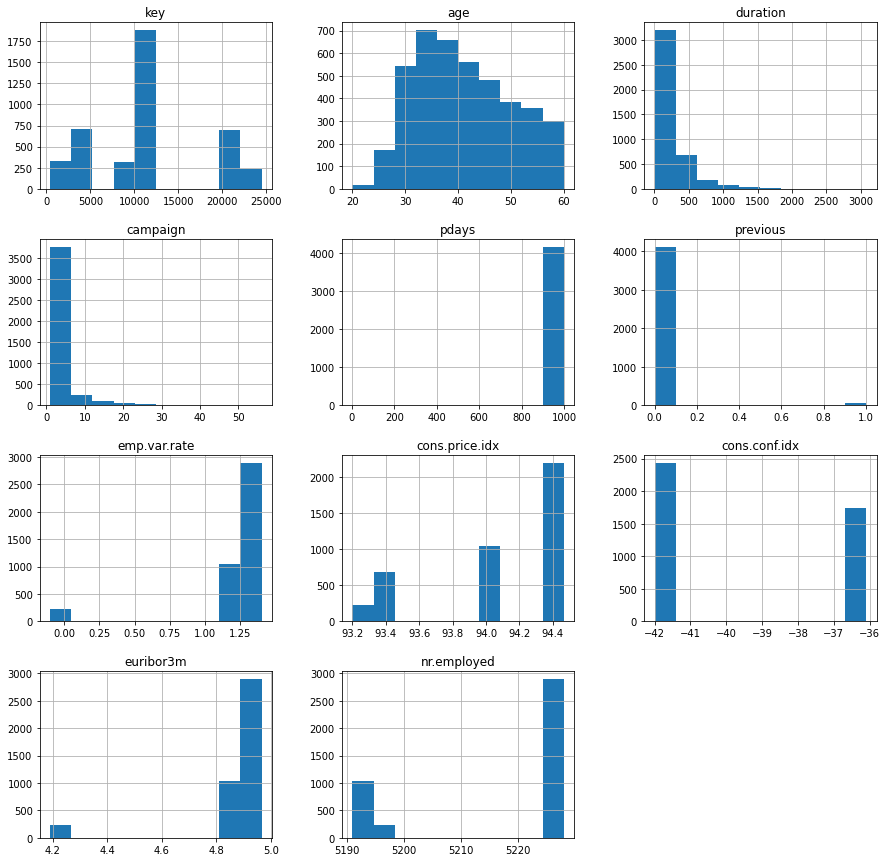

In [11]:
#Histogram grid
train.hist(figsize=(15,15))
plt.show()

# splitting the dataframe

In [12]:
# Converting the train into X and y so that we can pass it onto train_test_split function
# X --> contains the dataframe without the target i.e y
# y --> contains only the target value y
y = train['y']
X = train.drop('y',axis=1)

In [13]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [14]:
#further dividing the intermediate test data to test and validation set.
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [15]:
X_train.shape , X_val.shape , X_test.shape

((2919, 21), (625, 21), (626, 21))

# Feature Engineering

In [16]:
#checking the number of unique values.
train.nunique()

key               4170
age                 41
job                 12
marital              4
education            7
default              2
housing              3
loan                 3
contact              2
month                4
day_of_week          5
duration           814
campaign            38
pdays                3
previous             2
poutcome             3
emp.var.rate         3
cons.price.idx       4
cons.conf.idx        4
euribor3m           14
nr.employed          3
y                    2
dtype: int64

### Handling Categorical Variables

In [17]:
# encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

encoder = LabelEncoder()

encoder.fit(X_train['job'])
X_train['job_enc'] = encoder.transform(X_train['job'])
X_test['job_enc'] = encoder.transform(X_test['job'])
X_val['job_enc'] = encoder.transform(X_val['job'])

In [18]:
encoder1 = LabelEncoder()
encoder1.fit(X_train['marital'])
X_train['marital_enc'] = encoder1.transform(X_train['marital'])
X_test['marital_enc'] = encoder1.transform(X_test['marital'])
X_val['marital_enc'] = encoder1.transform(X_val['marital'])

In [19]:
encoder2 = LabelEncoder()
encoder2.fit(X_train['education'])
X_train['education_enc'] = encoder2.transform(X_train['education'])
X_test['education_enc'] = encoder2.transform(X_test['education'])
X_val['education_enc'] = encoder2.transform(X_val['education'])

In [20]:
encoder3 = LabelEncoder()
encoder3.fit(X_train['default'])
X_train['default_enc'] = encoder3.transform(X_train['default'])
X_test['default_enc'] = encoder3.transform(X_test['default'])
X_val['default_enc'] = encoder3.transform(X_val['default'])

In [21]:
encoder4 = LabelEncoder()
encoder4.fit(X_train['housing'])
X_train['housing_enc'] = encoder4.transform(X_train['housing'])
X_test['housing_enc'] = encoder4.transform(X_test['housing'])
X_val['housing_enc'] = encoder4.transform(X_val['housing'])

In [22]:
encoder5 = LabelEncoder()
encoder5.fit(X_train['loan'])
X_train['loan_enc'] = encoder5.transform(X_train['loan'])
X_test['loan_enc'] = encoder5.transform(X_test['loan'])
X_val['loan_enc'] = encoder5.transform(X_val['loan'])

In [23]:
encoder6 = LabelEncoder()
encoder6.fit(X_train['day_of_week'])
X_train['day_of_week_enc'] = encoder6.transform(X_train['day_of_week'])
X_test['day_of_week_enc'] = encoder6.transform(X_test['day_of_week'])
X_val['day_of_week_enc'] = encoder6.transform(X_val['day_of_week'])

In [24]:
encoder7 = LabelEncoder()
encoder7.fit(X_train['poutcome'])
X_train['poutcome_enc'] = encoder7.transform(X_train['poutcome'])

In [25]:
#Error !!!!!: Since X_val new catagories of poutcome are seen hence we have to explicitly add them to class 
#X_val['poutcome_enc'] = encoder7.transform(X_val['poutcome'])

# finding what are the new catagories in the validation set
diff = set(X_val['poutcome'])-set(encoder7.classes_)

# adding them to the classess variable // 
for items in diff:
    encoder7.classes_ = np.append(encoder7.classes_,items)

In [26]:
# doing same thing for test also

diff2 = set(X_test['poutcome'])-set(encoder7.classes_)
for items in diff2:
    encoder7.classes_ = np.append(encoder7.classes_,items)

In [27]:
X_val['poutcome_enc'] = encoder7.transform(X_val['poutcome'])
X_test['poutcome_enc'] = encoder7.transform(X_test['poutcome'])

In [28]:
encoder8 = LabelEncoder()
encoder8.fit(X_train['contact'])
X_train['contact_enc'] = encoder8.transform(X_train['contact'])

In [29]:
#Error !!!!!: Since X_val new catagories of contacts are seen hence we have to explicitly add them to class 
#X_val['contact_enc'] = encoder8.transform(X_val['contact'])

# finding what are the new catagories in the validation set
diff3 = set(X_val['contact'])-set(encoder8.classes_)

# adding them to the classess variable // 
for items in diff3:
    encoder8.classes_ = np.append(encoder8.classes_,items)
    
    
# doing same thing for test also

diff4 = set(X_test['contact'])-set(encoder8.classes_)
for items in diff4:
    encoder8.classes_ = np.append(encoder8.classes_,items)

In [30]:
X_test['contact_enc'] = encoder8.transform(X_test['contact'])
X_val['contact_enc'] = encoder8.transform(X_val['contact'])

In [31]:
encoder9 = LabelEncoder()
encoder9.fit(X_train['month'])
X_train['month_enc'] = encoder9.transform(X_train['month'])

In [32]:
#Error !!!!!: Since X_val new catagories of month are seen hence we have to explicitly add them to class 
#X_val['month_enc'] = encoder9.transform(X_val['month'])

# finding what are the new catagories in the validation set
diff5 = set(X_val['month'])-set(encoder9.classes_)

# adding them to the classess variable // 
for items in diff5:
    encoder9.classes_ = np.append(encoder9.classes_,items)
    
    
# doing same thing for test also

diff6 = set(X_test['month'])-set(encoder9.classes_)
for items in diff6:
    encoder9.classes_ = np.append(encoder9.classes_,items)

In [33]:
X_test['month_enc'] = encoder9.transform(X_test['month'])
X_val['month_enc'] = encoder9.transform(X_val['month'])

In [34]:
# function will delete a column from train , val and test
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [35]:
#deleting all the encoded columns.

X_train ,X_val, X_test = thanos_snap(['job'])
X_train ,X_val, X_test = thanos_snap(['marital'])
X_train ,X_val, X_test = thanos_snap(['education'])
X_train ,X_val, X_test = thanos_snap(['default'])
X_train ,X_val, X_test = thanos_snap(['housing'])
X_train ,X_val, X_test = thanos_snap(['loan'])
X_train ,X_val, X_test = thanos_snap(['contact'])
X_train ,X_val, X_test = thanos_snap(['month'])
X_train ,X_val, X_test = thanos_snap(['day_of_week'])
X_train ,X_val, X_test = thanos_snap(['poutcome'])

In [36]:
X_train.head()

,key,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,day_of_week_enc,poutcome_enc,contact_enc,month_enc
0,444,45,140,1,999,0,1.1,93.994,-36.4,4.857,...,4,1,5,0,2,0,3,0,0,1
1,445,34,175,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,2,0,0,0,3,0,0,1
2,446,47,136,1,999,0,1.1,93.994,-36.4,4.857,...,1,1,6,1,0,0,3,0,0,1
3,447,42,1623,1,999,0,1.1,93.994,-36.4,4.857,...,9,1,4,0,0,0,3,0,0,1
4,448,57,50,1,999,0,1.1,93.994,-36.4,4.857,...,9,1,0,1,0,2,3,0,0,1


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              2919 non-null   int64  
 1   age              2919 non-null   int64  
 2   duration         2919 non-null   int64  
 3   campaign         2919 non-null   int64  
 4   pdays            2919 non-null   int64  
 5   previous         2919 non-null   int64  
 6   emp.var.rate     2919 non-null   float64
 7   cons.price.idx   2919 non-null   float64
 8   cons.conf.idx    2919 non-null   float64
 9   euribor3m        2919 non-null   float64
 10  nr.employed      2919 non-null   float64
 11  job_enc          2919 non-null   int32  
 12  marital_enc      2919 non-null   int32  
 13  education_enc    2919 non-null   int32  
 14  default_enc      2919 non-null   int32  
 15  housing_enc      2919 non-null   int32  
 16  loan_enc         2919 non-null   int32  
 17  day_of_week_en

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

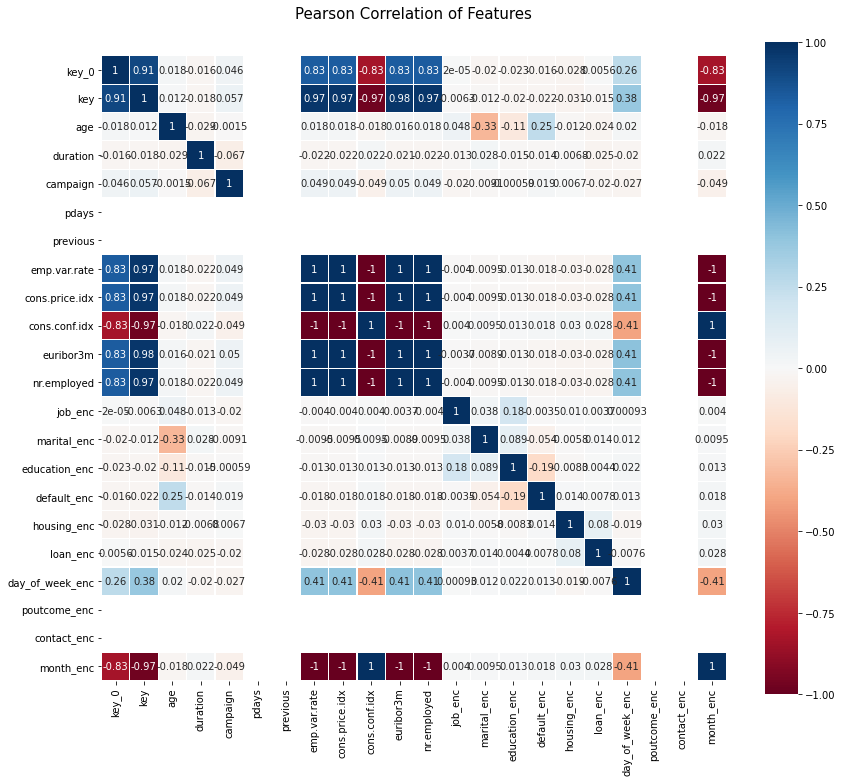

In [38]:
import  matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [39]:
del X_train['pdays']
del X_test['pdays']
del X_val['pdays']

del X_train['previous']
del X_test['previous']
del X_val['previous']

del X_train['poutcome_enc']
del X_test['poutcome_enc']
del X_val['poutcome_enc']

del X_train['contact_enc']
del X_test['contact_enc']
del X_val['contact_enc']

del X_train['default_enc']
del X_test['default_enc']
del X_val['default_enc']


In [40]:
X_train.head()

,key,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_enc,marital_enc,education_enc,housing_enc,loan_enc,day_of_week_enc,month_enc
0,444,45,140,1,1.1,93.994,-36.4,4.857,5191.0,4,1,5,2,0,3,1
1,445,34,175,1,1.1,93.994,-36.4,4.857,5191.0,0,1,2,0,0,3,1
2,446,47,136,1,1.1,93.994,-36.4,4.857,5191.0,1,1,6,0,0,3,1
3,447,42,1623,1,1.1,93.994,-36.4,4.857,5191.0,9,1,4,0,0,3,1
4,448,57,50,1,1.1,93.994,-36.4,4.857,5191.0,9,1,0,0,2,3,1


# Modelling

### Support vector Machine

In [41]:
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

In [42]:
svc_clf = SVC()
svc_clf.fit(X_train,y_train)

SVC()

In [43]:
prediction = svc_clf.predict(X_val)
accuracy_score(y_val, prediction)

0.9408

In [44]:
pd.DataFrame(zip(y_val, prediction), columns = ['actuals', 'prediction'])

,actuals,prediction
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
...,...,...
620,no,no
621,no,no
622,yes,no
623,no,no


### Decision tree classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
prediction2 = clf2.predict(X_val)
accuracy_score(y_val, prediction2)

0.9456

In [47]:
prediction3 = clf2.predict(X_test)
accuracy_score(y_test, prediction3)

0.9472843450479234

### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
clf3.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
prediction4 = clf3.predict(X_val)
accuracy_score(y_val, prediction4)

0.952

In [50]:
prediction5 = clf3.predict(X_test)
accuracy_score(y_test, prediction5)

0.9552715654952076

### Test Set

In [51]:
test1.head()

,key,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [52]:
test1.shape

(37018, 21)

In [53]:
t1 = test1.copy()
t1 = t1.drop_duplicates()
t1.shape

(37018, 21)

In [54]:
test = test1.copy()

### we have to bring the test set in same format as that of the train set

In [55]:
#Do same preprocessing steps
#Do same feature engg
#Do same feature selection
#fed to model and predict

In [56]:
test.isnull().sum()

key               0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [57]:
#drop any duplicates in the data

test = test.drop_duplicates()

In [58]:
test.shape

(37018, 21)

In [59]:
test.nunique()

key               37018
age                  78
job                  12
marital               4
education             8
default               3
housing               3
loan                  3
contact               2
month                10
day_of_week           5
duration           1501
campaign             38
pdays                27
previous              8
poutcome              3
emp.var.rate         10
cons.price.idx       26
cons.conf.idx        26
euribor3m           316
nr.employed          11
dtype: int64

In [60]:
# encoding the categorical variables

test['marital_enc'] = encoder1.transform(test['marital'])

test['housing_enc'] = encoder4.transform(test['housing'])

test['loan_enc'] = encoder5.transform(test['loan'])

test['day_of_week_enc'] = encoder6.transform(test['day_of_week'])

In [61]:
# Again new classes are there in the test set
temp = set(test['job'])-set(encoder.classes_)
for items in temp:
    encoder.classes_= np.append(encoder.classes_,items)
test['job_enc'] = encoder.transform(test['job'])

In [62]:
temp1 = set(test['education'])-set(encoder2.classes_)
for items in temp1:
    encoder2.classes_= np.append(encoder2.classes_,items)
test['education_enc'] = encoder2.transform(test['education'])

In [63]:
temp2 = set(test['month'])-set(encoder9.classes_)
for items in temp2:
    encoder9.classes_= np.append(encoder9.classes_,items)
test['month_enc'] = encoder9.transform(test['month'])

In [64]:
test.drop(['marital','housing','loan','day_of_week','job','education','month'],inplace =True ,axis=1)

In [65]:
test.drop(['pdays','previous','poutcome','contact','default'],inplace =True ,axis=1)

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37018 entries, 0 to 37017
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              37018 non-null  int64  
 1   age              37018 non-null  int64  
 2   duration         37018 non-null  int64  
 3   campaign         37018 non-null  int64  
 4   emp.var.rate     37018 non-null  float64
 5   cons.price.idx   37018 non-null  float64
 6   cons.conf.idx    37018 non-null  float64
 7   euribor3m        37018 non-null  float64
 8   nr.employed      37018 non-null  float64
 9   marital_enc      37018 non-null  int32  
 10  housing_enc      37018 non-null  int32  
 11  loan_enc         37018 non-null  int32  
 12  day_of_week_enc  37018 non-null  int32  
 13  job_enc          37018 non-null  int32  
 14  education_enc    37018 non-null  int32  
 15  month_enc        37018 non-null  int32  
dtypes: float64(5), int32(7), int64(4)
memory usage: 3.8 MB


In [67]:
test.shape

(37018, 16)

In [68]:
final_result = clf3.predict(test)

In [69]:
final_result

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [70]:
final_result = pd.Series(final_result,name='y')

In [71]:
# resetting the index of test1 so that we can merge price series with it
test1.reset_index(drop=True,inplace=True)

In [72]:
final_result

0        no
1        no
2        no
3        no
4        no
         ..
37013    no
37014    no
37015    no
37016    no
37017    no
Name: y, Length: 37018, dtype: object

In [73]:
len(test.index)

37018

In [74]:
len(final_result)

37018

In [75]:
Final = test1.merge(final_result , on = test.index )
Final

,key_0,key,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,1,56,housemaid,married,basic.4y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,2,57,services,married,high.school,unknown,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,3,37,services,married,high.school,no,yes,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,4,40,admin.,married,basic.6y,no,no,no,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,5,56,services,married,high.school,no,no,yes,telephone,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37013,37013,41184,73,retired,married,professional.course,no,yes,no,cellular,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37014,37014,41185,46,blue-collar,married,professional.course,no,no,no,cellular,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37015,37015,41186,56,retired,married,university.degree,no,yes,no,cellular,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37016,37016,41187,44,technician,married,professional.course,no,no,no,cellular,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
